# Table of Contents
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([ 0.5841,  0.7075,  0.7891,  0.8836,  0.2838,  0.0668,  0.0564,  0.0749,  0.3513,  0.956 ,
        0.3502,  0.3068,  0.2828,  0.6877,  0.5862,  0.1293,  0.973 ,  0.0292,  0.841 ,  0.8463,
        0.4232,  0.7897,  0.3808,  0.0313,  0.1128,  0.6571,  0.5409,  0.0865,  0.8767,  0.6954])

In [6]:
y

array([  9.7522,  10.1224,  10.3673,  10.6507,   8.8515,   8.2004,   8.1691,   8.2246,   9.054 ,
        10.8681,   9.0505,   8.9203,   8.8485,  10.0631,   9.7586,   8.3878,  10.9191,   8.0877,
        10.5231,  10.5388,   9.2697,  10.3692,   9.1424,   8.0939,   8.3384,   9.9713,   9.6227,
         8.2594,  10.6302,  10.0861])

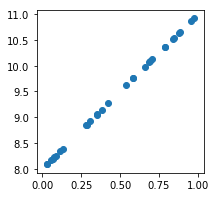

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.0046

In [10]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [11]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [12]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani

RuntimeError: No MovieWriters available!